In this guided project, we'll visualize the gender gap across college degrees. We use a predefined dataset provided by Dataquest.io that gives proportions of women in a variety of different college majors in the US. The corresponding proportion of men for a given major can be deduced as 100 - the given proportion of women. The first 5 rows of the dataset are given below to give an idea of the information covered.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

women_degrees.head(5)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


There are seventeen degrees that we need to generate line charts for. The degrees are grouped into STEM, liberal arts, and other, in the following way. Therefore, we'll use a subplot grid layout of 6 rows by 3 columns.

In [21]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

<h2> Visualising with Matplotlib <h2>

We will then generate the suplot grid with 6 rows and 3 columsn to easily compare the ratios among different majors. 

We will use line graphs to visualize how the proportions of men vs. women in different degree categories have changed over the years.

We'll designate 2 colors to use for Men and Women lines using distinct RGB codes.

We will visualize the data using a Seaborn-generated small multiple grid.

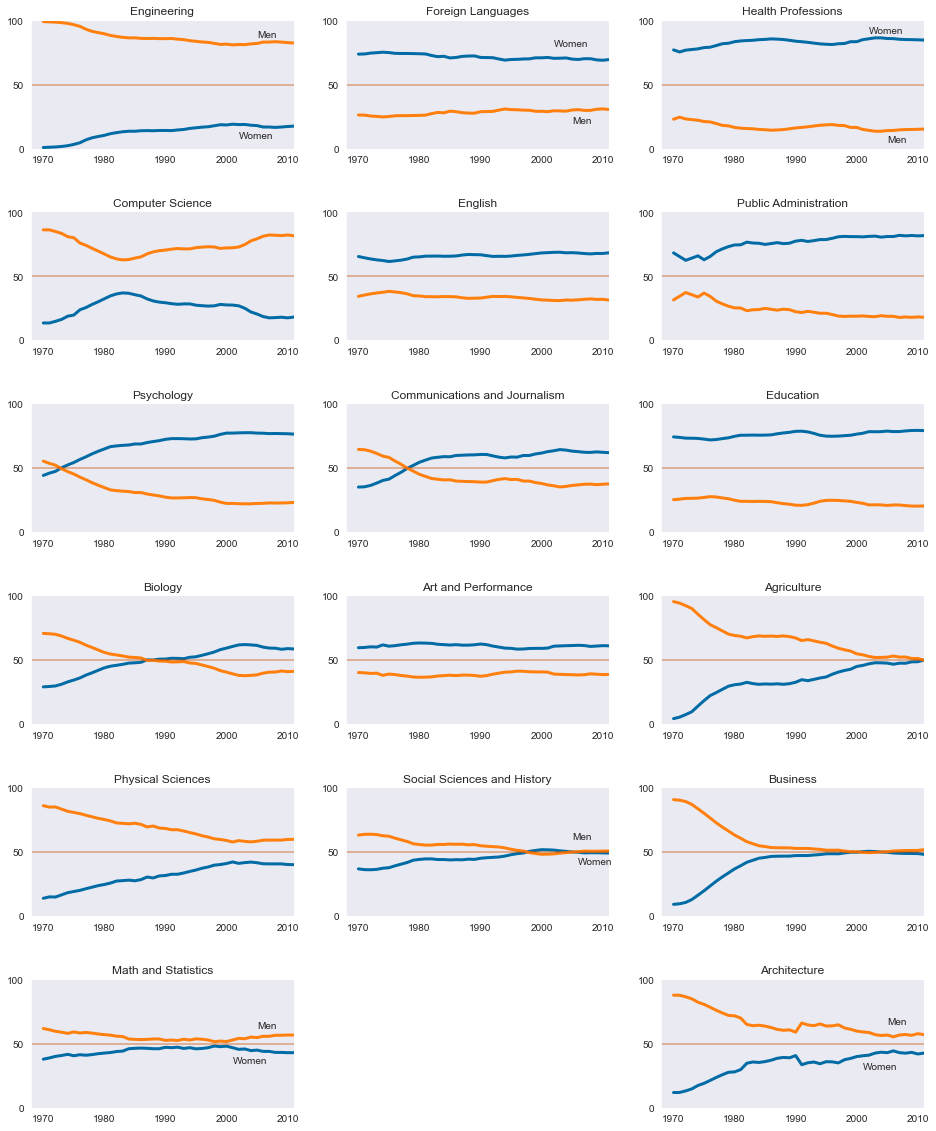

In [64]:
%matplotlib inline


## Set the colors of our lines for Men and Women. I'm using the Color Blind 10 Palette from Tableau 
## to ensure accessibility
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

## Set the figure size, estimating for the need of 3 long columns: one for each major category
fig = plt.figure(figsize=(16,20))

## Generate the first column for STEM categories. Will need to set
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    ## We set y-tick labels only at 0 and 100 to reduce overall clutter yet still give the audience important
    ## information regarding the range of values
    ax.set_yticks([0,50,100])
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    ## I also set a horizontal line across each graph (and in each category) to better visually indicate where
    ## the 50% mark is and how different degrees progress towards or away from it over time
    ## I use the maroon color from the Color Blind 10 palette for each line
    ## I also set the transparency to 0.5
    ax.axhline(50, c=(200/255, 82/255, 0/255), alpha=0.5)
    sns.despine()
    sns.set_style("dark")

    if cat_index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
## Generate 2nd column for liberal arts categories.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,50,100])
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.axhline(50, c=(200/255, 82/255, 0/255), alpha=0.5)
    sns.despine()
    sns.set_style("dark")
    
    if cat_index == 0:
        ax.text(2005, 20, 'Men')
        ax.text(2002, 80, 'Women')
    elif cat_index == 4:
        ax.text(2005, 60, 'Men')
        ax.text(2006, 40, 'Women')
        
## Generate 3rd column for other major categories.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,50,100])
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.axhline(50, c=(200/255, 82/255, 0/255), alpha=0.5)
    sns.despine()
    sns.set_style("dark")
    
    if cat_index == 0:
        ax.text(2005, 5, 'Men')
        ax.text(2002, 90, 'Women')
    elif cat_index == 5:
        ax.text(2005, 65, 'Men')
        ax.text(2001, 30, 'Women')
        
## I adjust the vertical space between each subplot to ensure that the x-axis values do not overalap with
## the next subplot's subtitle
plt.subplots_adjust(hspace = 0.5)

## I export the visulisation as a PNG file for external use
plt.savefig('gender_gap_degrees.png')
plt.show()

<h2> Visualising with Seaborn <h2>

In the visualisation above, I used a combination of matplotlib for setting parameters and logistics and Seaborn for aesthetics. by spreading out data from each major category in various subplots, we can see how the ratio of women to men changed over time within reach. Now, I use Seaborn to plot the data for the proportion of women from each major cateogry together on one graph per category. This will allow us to more quickly visualise which major increased it's share of women most rapidly.

In [ ]:
## Should look up how to pivot the table so Year replaces the index column